# What do our likelihood surfaces look like?

Bayes:

$$ p(\theta | d) \propto p(d|\theta) \pi(\theta)$$

For a uniform prior, the posterior will look like the likelihood, modulo a normalization factor.

Lets see what some of our univariate likelihood curves look like (i.e. holding all other parameters constant)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [4]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1. Example system

Attention: You are including the PSR terms in your synthetic data generation
Attention: You are including the PSR terms in your measurement model
omega_gw =  5e-07
Ideal likelihood =  28887.90154893452
Mean residual: 5.717010517610002e-15


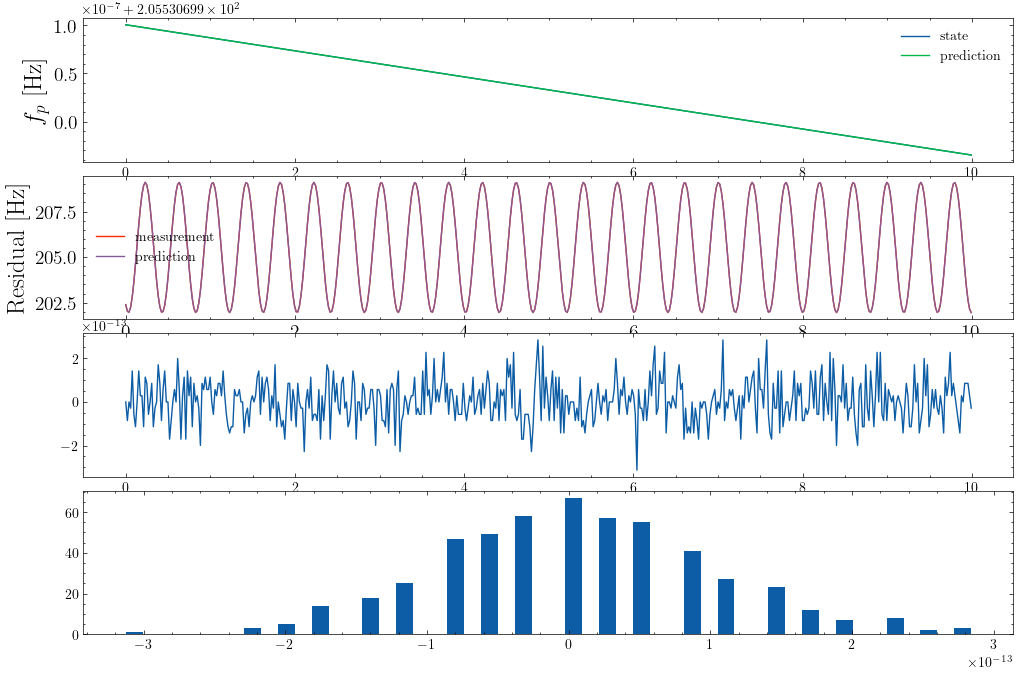

In [5]:
# Example Setup
P   = SystemParameters(h=1e-2,σp=0.0,σm=1e-13)       # define the system parameters as a class
PTA = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P) #generate some synthetic data


#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
model_likelihood,xres,yres = KF.likelihood(guessed_parameters)
print("Ideal likelihood = ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xres,yres, 1,savefig=None)


---


### 2. Likelihood curves

In [6]:
from plotting import iterate_over_priors


import matplotlib.pyplot as plt 
def plot_likelihood(x,y,x_logscale,y_logscale,variable_name,x_critical):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

    ax.plot(x,y)

    if x_logscale:
        ax.set_xscale('log')
    if y_logscale:
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel(variable_name)
    ax.set_ylabel("likelihood")

    plt.show()



---


#### 2.1 GW source declination - $\delta$ 

omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =

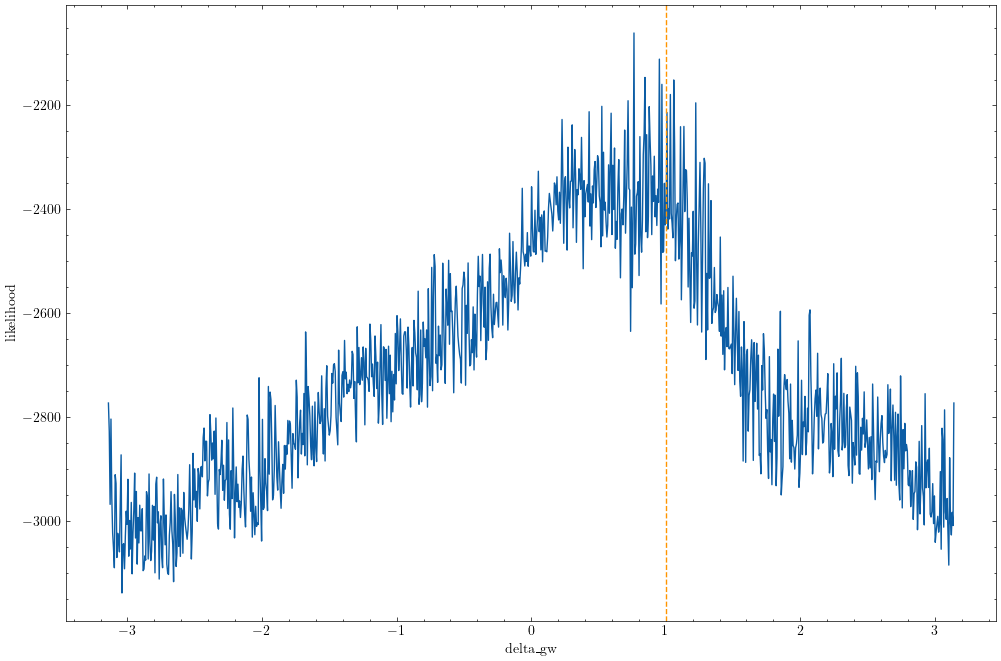

In [7]:
import numpy as np 
variable = "delta_gw"
variable_range = np.linspace(-np.pi,np.pi,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable])


omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =

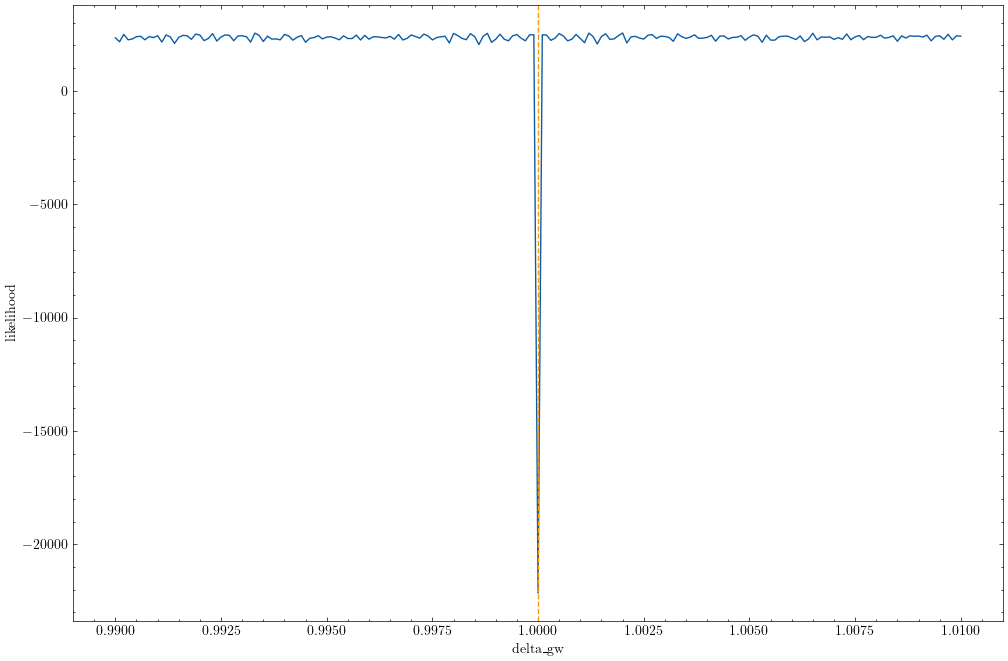

In [8]:
variable = "delta_gw"
variable_range = np.arange(0.99,1.01,0.0001)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,-likelihoods,False,False,variable,guessed_parameters[variable])


omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =  5e-07
omega_gw =

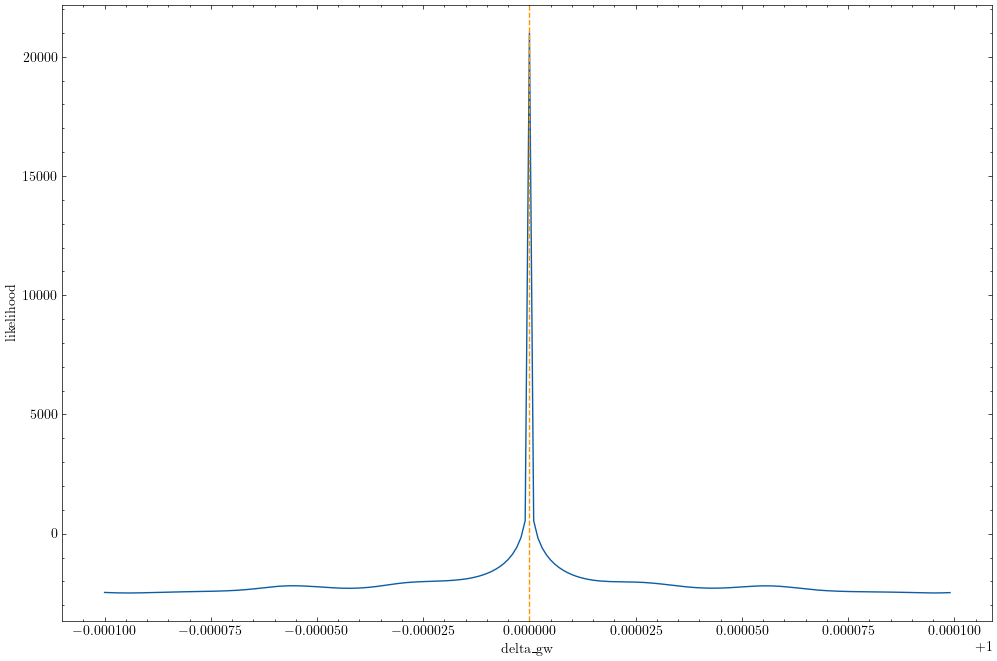

In [9]:
variable = "delta_gw"
eps = 1e-4
variable_range = np.arange(1.0-eps,1.0+eps,eps/100.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable])


---


#### 2.2 GW source angular frequency - $\omega$ 

omega_gw =  1e-09
omega_gw =  1.0092621909870485e-09
omega_gw =  1.0186101701559773e-09
omega_gw =  1.0280447320933076e-09
omega_gw =  1.0375666787451849e-09
omega_gw =  1.0471768194855203e-09
omega_gw =  1.0568759711848051e-09
omega_gw =  1.066664958279541e-09
omega_gw =  1.0765446128423137e-09
omega_gw =  1.0865157746525372e-09
omega_gw =  1.0965792912678099e-09
omega_gw =  1.1067360180959745e-09
omega_gw =  1.116986818467825e-09
omega_gw =  1.1273325637104848e-09
omega_gw =  1.1377741332214901e-09
omega_gw =  1.1483124145435111e-09
omega_gw =  1.1589483034398119e-09
omega_gw =  1.169682703970387e-09
omega_gw =  1.180516528568803e-09
omega_gw =  1.1914506981197747e-09
omega_gw =  1.2024861420374123e-09
omega_gw =  1.2136237983442418e-09
omega_gw =  1.2248646137509333e-09
omega_gw =  1.2362095437367665e-09
omega_gw =  1.2476595526308685e-09
omega_gw =  1.259215613694151e-09
omega_gw =  1.2708787092020595e-09
omega_gw =  1.2826498305280626e-09
omega_gw =  1.2945299782279134e-09
omega_g

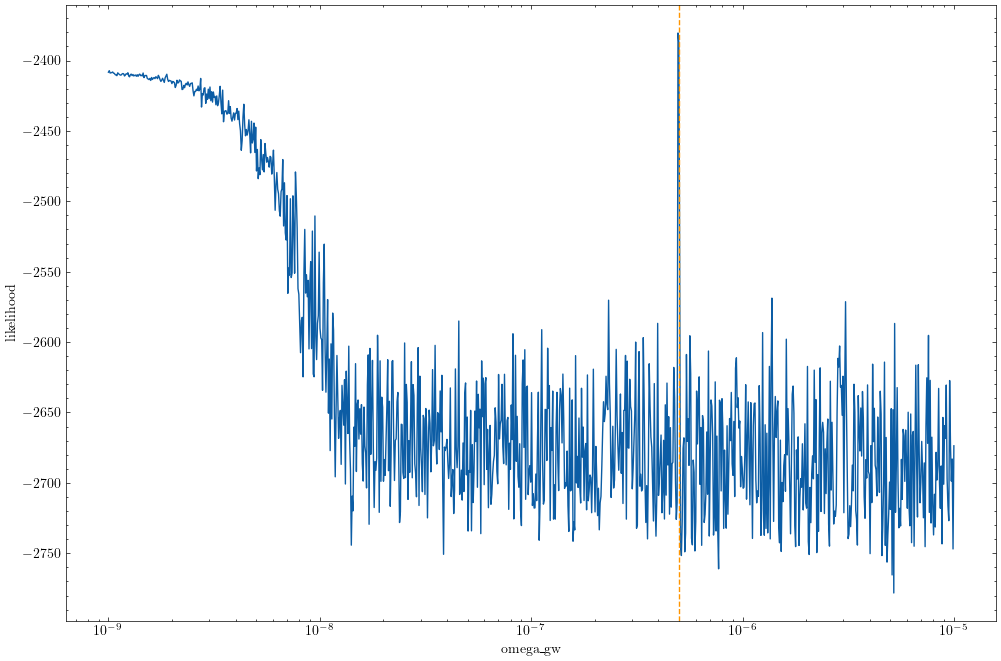

In [10]:
variable = "omega_gw"
variable_range = np.logspace(-9,-5,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable])


omega_gw =  4e-07 -2691.3843579385643
omega_gw =  4.001e-07 -2622.513259491196
omega_gw =  4.002e-07 -2703.6978638095034
omega_gw =  4.003e-07 -2698.8689448679634
omega_gw =  4.004e-07 -2616.929855220474
omega_gw =  4.005e-07 -2707.9324019189016
omega_gw =  4.0060000000000003e-07 -2666.6028644828666
omega_gw =  4.0070000000000003e-07 -2651.676675362876
omega_gw =  4.0080000000000004e-07 -2722.4592179586894
omega_gw =  4.0090000000000005e-07 -2689.2850096647517
omega_gw =  4.0100000000000006e-07 -2638.6398117723506
omega_gw =  4.0110000000000006e-07 -2741.4642092270446
omega_gw =  4.0120000000000007e-07 -2631.094090357798
omega_gw =  4.013000000000001e-07 -2672.1905225622086
omega_gw =  4.014000000000001e-07 -2715.345081312142
omega_gw =  4.015000000000001e-07 -2629.833534508531
omega_gw =  4.016000000000001e-07 -2692.912630707246
omega_gw =  4.017000000000001e-07 -2729.421362071251
omega_gw =  4.018000000000001e-07 -2655.8128890118114
omega_gw =  4.019000000000001e-07 -2699.83838817437

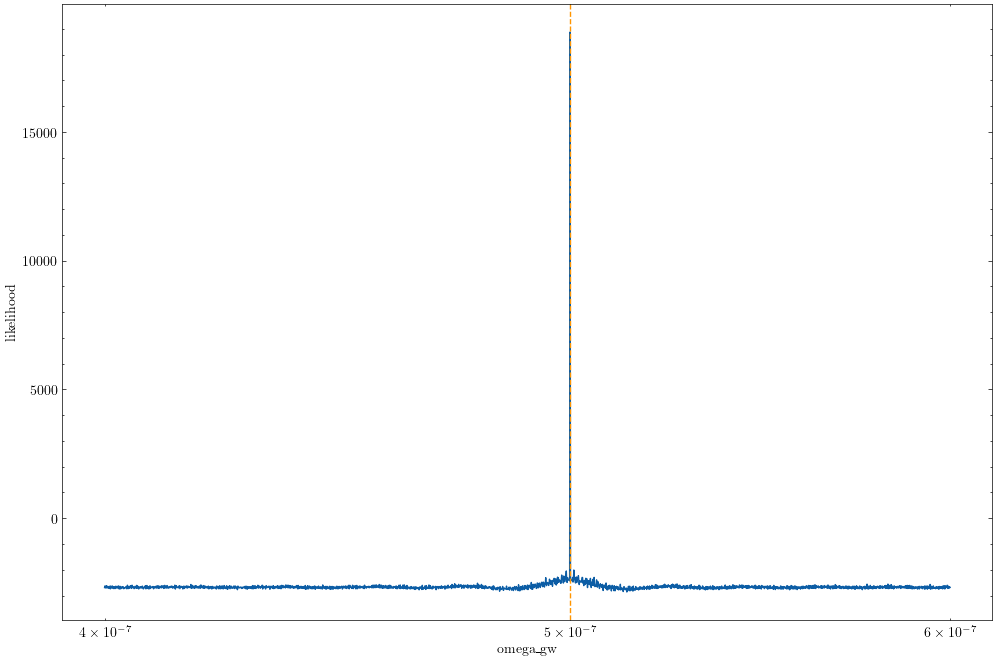

In [11]:
variable = "omega_gw"
variable_range = np.arange(4e-7,6e-7,1e-10)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable])


omega_gw =  4.999e-07 -2430.639131216727
omega_gw =  4.999002e-07 -2424.564637124347
omega_gw =  4.999003999999999e-07 -2417.6654153334457
omega_gw =  4.999005999999999e-07 -2409.9765720633877
omega_gw =  4.999007999999999e-07 -2401.55099234419
omega_gw =  4.999009999999999e-07 -2392.458912059657
omega_gw =  4.999011999999999e-07 -2382.7871167026055
omega_gw =  4.999013999999999e-07 -2372.6378622421767
omega_gw =  4.999015999999998e-07 -2362.1276426108407
omega_gw =  4.999017999999998e-07 -2351.385926552706
omega_gw =  4.999019999999998e-07 -2340.5539477661564
omega_gw =  4.999021999999998e-07 -2329.783535073717
omega_gw =  4.999023999999998e-07 -2319.235839795856
omega_gw =  4.999025999999998e-07 -2309.0796689872686
omega_gw =  4.999027999999998e-07 -2299.489031622514
omega_gw =  4.999029999999997e-07 -2290.639476350231
omega_gw =  4.999031999999997e-07 -2282.702898267658
omega_gw =  4.999033999999997e-07 -2275.8407228975566
omega_gw =  4.999035999999997e-07 -2270.1957202774665
omega_

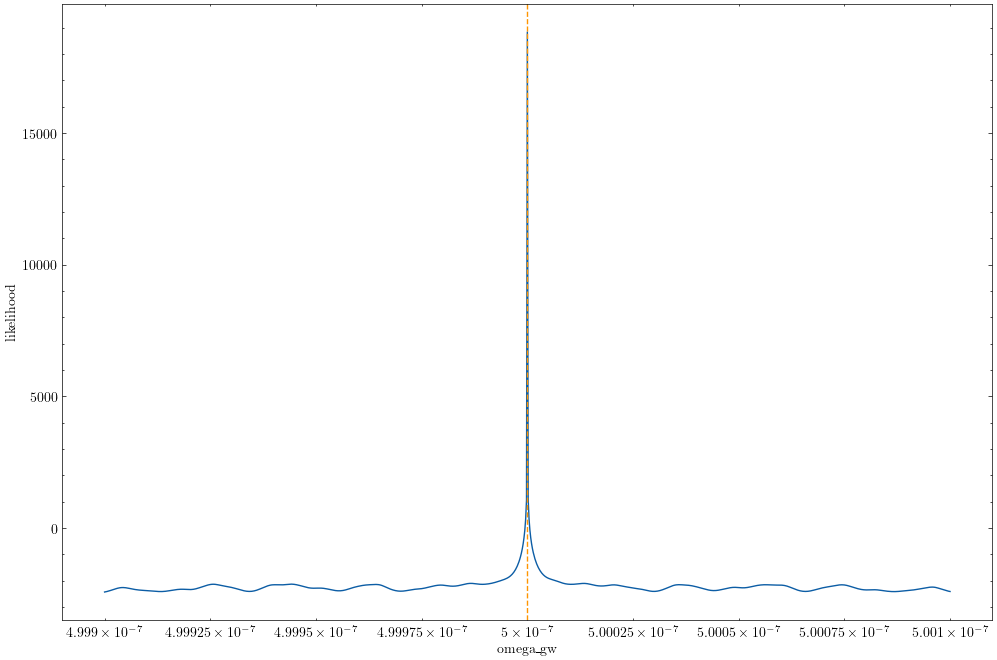

In [12]:
variable = "omega_gw"
eps = 1e-10
variable_range = np.arange(5e-7-eps,5e-7+eps,eps/500.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable])


#### 2.3 GW source phase offset - $\Phi_0$

omega_gw =  5e-07 -2858.1583887516176
omega_gw =  5e-07 -2829.8788004237026
omega_gw =  5e-07 -2799.7517722752214
omega_gw =  5e-07 -2767.663353664216
omega_gw =  5e-07 -2733.4817895657766
omega_gw =  5e-07 -2697.056240607373
omega_gw =  5e-07 -2658.215072184083
omega_gw =  5e-07 -2616.763037530308
omega_gw =  5e-07 -2572.4769792136117
omega_gw =  5e-07 -2525.09986114042
omega_gw =  5e-07 -2474.3329037876115
omega_gw =  5e-07 -2419.825391204216
omega_gw =  5e-07 -2361.1613991999907
omega_gw =  5e-07 -2297.8422507552177
omega_gw =  5e-07 -2229.2628627750773
omega_gw =  5e-07 -2154.679141357425
omega_gw =  5e-07 -2073.1619389167945
omega_gw =  5e-07 -1983.530264006203
omega_gw =  5e-07 -1884.2513733393514
omega_gw =  5e-07 -1773.285839747953
omega_gw =  5e-07 -1647.8366702132337
omega_gw =  5e-07 -1503.9209339689767
omega_gw =  5e-07 -1335.5879433075097
omega_gw =  5e-07 -1133.3634798437618
omega_gw =  5e-07 -880.768022992467
omega_gw =  5e-07 -545.0738532733795
omega_gw =  5e-07 -44.883

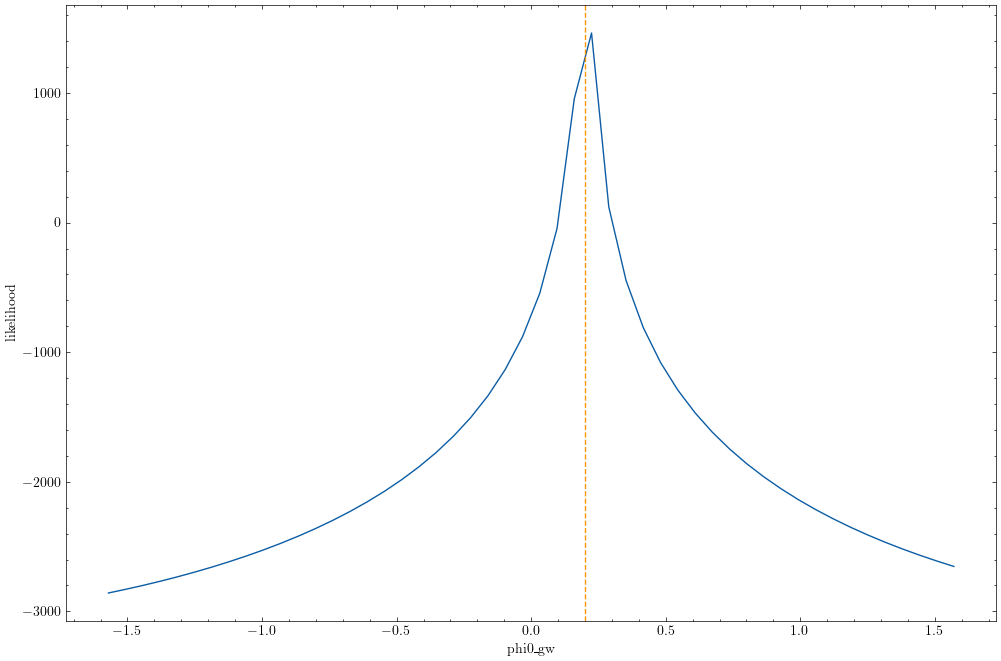

In [13]:
variable = "phi0_gw"
variable_range = np.linspace(-np.pi/2,np.pi/2)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable])


### 3. All likelihood curves for $\bar{\theta}_{GW}$

0 omega_gw 5e-07
omega_gw =  1e-09 -2408.2769768375347
omega_gw =  1.0092621909870485e-09 -2407.220408627115
omega_gw =  1.0186101701559773e-09 -2408.887440964849
omega_gw =  1.0280447320933076e-09 -2408.7015257226603
omega_gw =  1.0375666787451849e-09 -2408.526327852459
omega_gw =  1.0471768194855203e-09 -2408.1459881588303
omega_gw =  1.0568759711848051e-09 -2408.9650029650866
omega_gw =  1.066664958279541e-09 -2409.117212948397
omega_gw =  1.0765446128423137e-09 -2410.019250275622
omega_gw =  1.0865157746525372e-09 -2410.291971507398
omega_gw =  1.0965792912678099e-09 -2410.7469934053365
omega_gw =  1.1067360180959745e-09 -2408.7263258412477
omega_gw =  1.116986818467825e-09 -2409.4026376739434
omega_gw =  1.1273325637104848e-09 -2409.839784883315
omega_gw =  1.1377741332214901e-09 -2410.344924646472
omega_gw =  1.1483124145435111e-09 -2410.3008453846787
omega_gw =  1.1589483034398119e-09 -2409.621654819415
omega_gw =  1.169682703970387e-09 -2409.2539178233405
omega_gw =  1.18051652

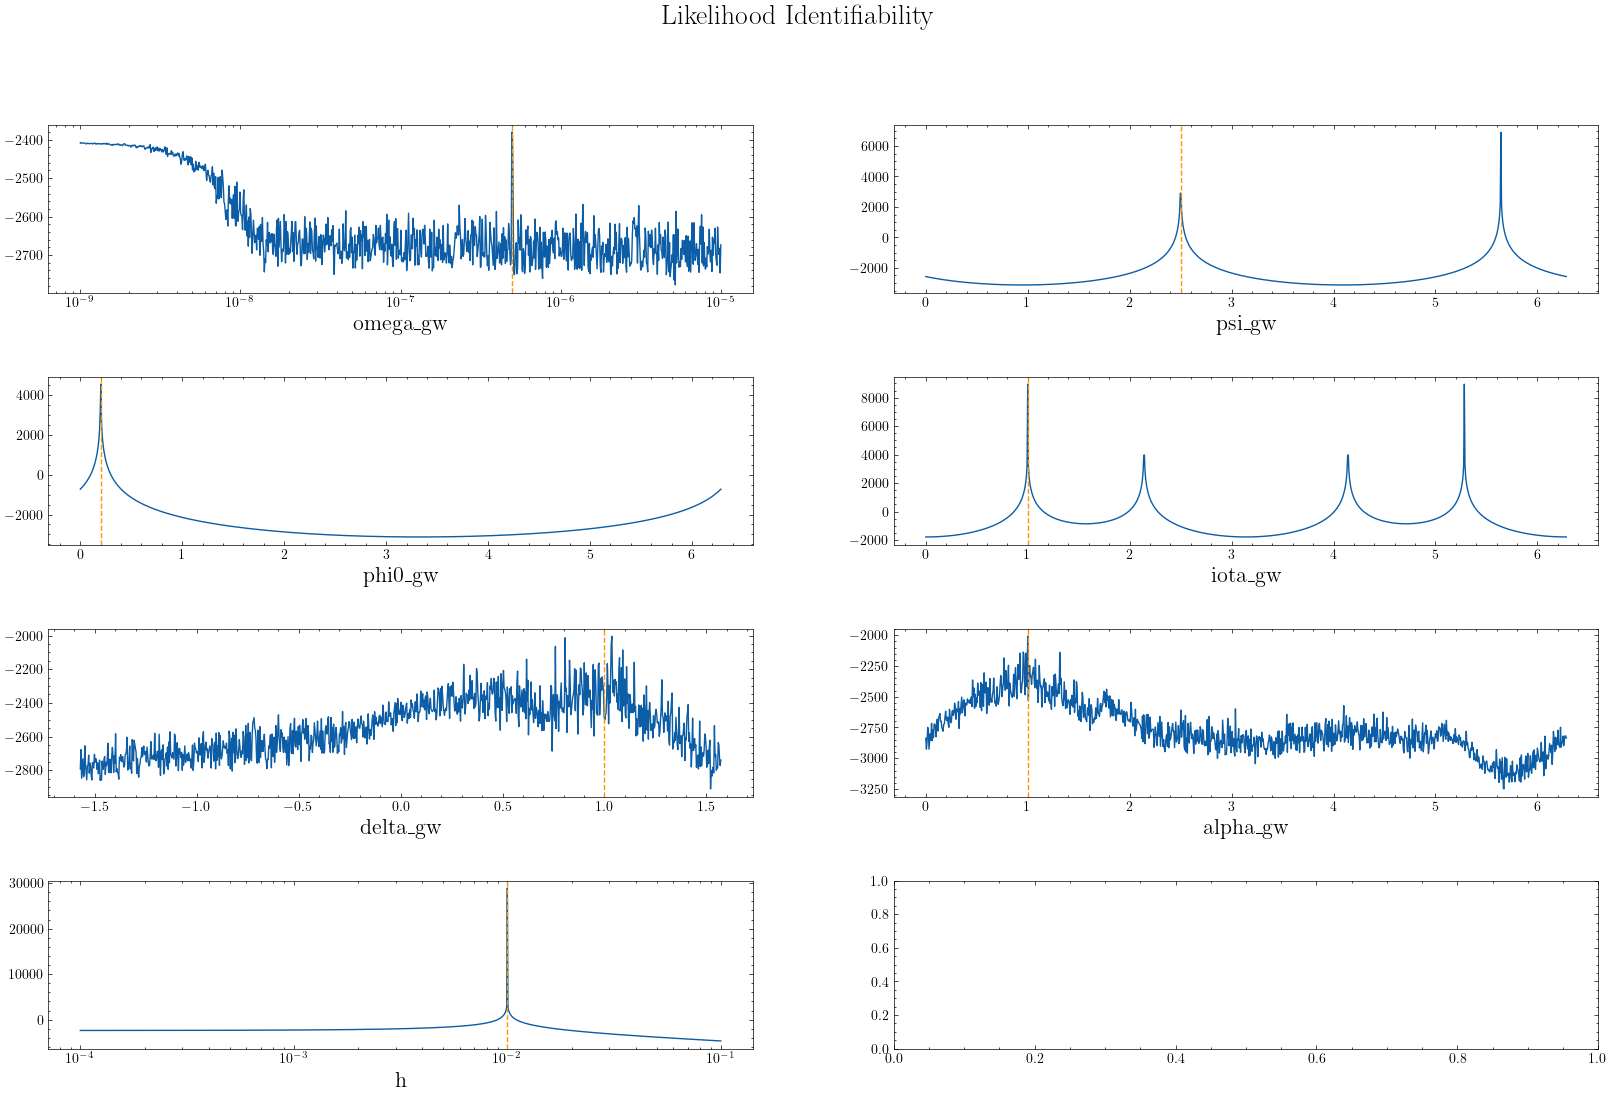

In [14]:
selected_parameters = ["omega_gw",
                       "psi_gw",
                        "phi0_gw",
                        "iota_gw",
                        "delta_gw",
                        "alpha_gw",
                        "h"]
parameters_dict = {k: guessed_parameters[k] for k in selected_parameters}


nsamples = int(1e3)

priors = [np.logspace(-9,-5,nsamples),                   # omega
          np.linspace(0,2*np.pi,nsamples),               # psi
          np.linspace(0,2*np.pi,nsamples),               # phi0
          np.linspace(0,2*np.pi,nsamples),               # iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),    # delta
          np.linspace(0,2*np.pi,nsamples),               # alpha
          np.logspace(-4,-1,nsamples),                   # h
]

from plotting import likelihoods_over_priors
likelihoods_over_priors(parameters_dict,priors,PTA,P,KF)
